In [1]:
import pandas as pd
import numpy as np
import itertools
import math
from matplotlib import pyplot as plt

# Notes

## 1.2 Sample Spaces

Sample space: Set of all possible outcomes of the experiment

Sample spaces can be finite, contably infitite, or uncountably infinite.
- A set is "finite" if it can be placed in 1-1 correspondence with the set of natural numbers $<n$ for some $n$. More generally, it is sufficient to place it in 1-1 correspondence with some set of integers which is bounded both above and below.
- A set is "countable" if it can be placed in 1-1 correspondence with some subset of the natural numbers. Note that this includes finite sets, but also some infinite sets. Since the sets of all rationals is in 1-1 correspondence with the set of naturals, it is sufficient to place a set in 1-1 correspondence with some set of rationals to show that it is countable.
- A set is "infinite" if it is not finite. Since any finite set of real numbers is bounded, to prove a set is infinite, it is sufficient to put it in 1-1 correspondence with any unbounded set of real numbers.
- A set is "countably infinite" or "denumerable", if it is both countable and infinite. From the above remarks, it follows that to prove denumerability, it is sufficient to put a set in 1-1 correspondence with some unbounded set of rational numbers.
- A set is "uncountable" if it is not countable. Since all finite sets are countable, uncountable sets are all infinite. Per Cantor's theorem, the real numbers are uncountable. Further, since any interval can be put in 1-1 correspondence with the entire set of real numbers, to show a set is uncountable, it is sufficient to put it in 1-1 correspondence with some interval. 

[Source: Math Stackexchange](https://math.stackexchange.com/questions/1560332/countably-infinite-uncountable-or-finite)

**De Morgan's laws**

$(A\cup B)^c = A^c \cap B^c$ and $(A \cap B)^c = A^c \cup B^c$

**Example**

A coin is flipped 10 times. Writing Heads as H and Tails as T, a possible outcome (pebble) is HHHTHHTTHT, and the sample space is the set of all possible strings of length 10 of H's and T's. We can (and will) encode H as 1 and T as 0, so that an outcome is a sequence $(s_1,…, s_{10})$ with $s_j \in {0,1}$, and the sample space is the set of all such sequences. Now let's look at some events:

1. Let $A_1$ bee the event that the first flip is H. As a set:

$A_1 = \{(1,s_2,...,s_10): s_j \in \{0,1\}$ for $2 \leq j \leq 10\}$

2. Let $B$ be the event that at leas one flip was H. As a set:

$B = \bigcup_{j=1}^{10}A_j$

3. Let $C$ be the event that all the flips were H. As a set:

$C=\bigcap_{j=1}^{10}A_j$

4. Let $D$ be the event that there were at least two consecutive H. As a set:

$D = \bigcup_{j=1}^{9}(A_j \cup A_{j+1})$


## 1.3 Naive definition of probability

Definition:

$P_n = \frac{|A|}{|S|}$ 

Problems where definition is applicable:
- where there is symetry in the problem that makes the outcome equaly likely, for example: coin toss
- when the outcomes are equaly likely by design, for example: survey of $n$ people in a population of $N$ people
- when the naive definition serves as a useful null model. We assume the naive definition applies and compare the answers it provides to observed data.

## 1.4 Counting

### Multiplication rule

Consider a compound experiment consisting of two sub-experiments: $A$ and $B$. Experiment $A$ has $a$ possible outcomes, and for each of those outcomes experiment $B$ has $b$ possible outcomes. The compound experiment has $ab$ possible outcomes.

**Example**

We buy icecream and there are wafffle, and cake cones, and chocolate, vanilla, and strawberry flavours.

1. Total number of options: $2 \cdot 3 = 3 \cdot 2 = 6$
2. If we buy two icecreams on a certain day, one in the afternoon and one in the evening, then the number of possibilities is: $6^2=36$
3. If you are only interested in the number of icecreams you had in the day, not the order then we have: $6 \cdot 5 = 30$ ordered possibilities excluding repeated flavours like (Cake-Vanilla, Cake-Vanilla). This becomes $\frac{30}{2} = 15$ unordered possibilities because (Cake-Vanilla, Waffle-Vanilla) is equivalent to (Waffle-Vanilla, Cake-Vanilla) plus 6 repeated flavours: $15 + 6 = 21$.

Note that the 36 ordered pairs are equally likely but the 21 combinations are not.

From the multiplication rule, we can conclude that a set with $n$ elements has $2^n$ subsets. For example, the set $\{a,b,c\}$ has eight subsets including the set itself and the empty set:

$\emptyset, \{a\}, \{b\}, \{c\}, \{a,b\}, \{a,c\}, \{b,c\}, \{a,b,c\}$

### Sampling with replacement

If we have $n$ objects and making $k$ choices from them, one at a time with replacement, then there are $n^k$ possible outcomes. Each sample object is a sub-experiment and there are $k$ sub-experiments. So there are $n^k$ ways to obtain a sample of size $k$.

### Sampling without replacement

If we have $n$ objects and making $k$ choices from them, one at a time without replacemen, then there are $n(n-1)...(n-k+1)$ possible outcomes for $k\leq n$ and $0$ possiblities for $k \gt n$. Each sampled object is a sub-experiment, and the number of possible outcomes decreases by one each time.

### Petmutations and factorials

A permutation of $1,2,...,n$ is an arrangmenet of them in some order. By the theorem of sampling without replacement with $k=n$, there are $n!$ permutations of $1,2,...,n$

**Example**

There are $k$ people in a room. Assume each person's birthday is equaly likely to be any of the 365 days of the year (excluding February 29), and that people's birthdays are independent (assume there are no twins in the room). What is the probability that two or more people in the group have the same birthday?

There are $365^k$ possible ways of assigning birthdays. To calculate the probability of two or more people in the group having the same birthday we would have to divide all the possibilities that any two or more people share a birthday by the total number of possibilities. 

We can solve it by counting the compliment: the number of ways to assign birthdays to $k$ people such that no two people share a birthday. This is equivalent to sampling the 365 days of the year without replacement. If one person already has it, then no one else can have it.

So the probability that no two people will share a birthday is:

$P(b^c) = \frac{365 \cdot 364 \cdot 363 \cdot ... \cdot (365-k+1)}{356^k}$ for $k\leq365$

Which means that the probability of at least two people having the same birthday is:

$P(b) = 1-P(b^c)$

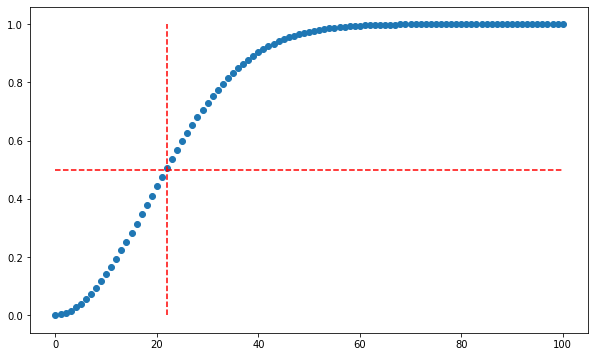

In [164]:
# Plot the probability of at least two people sharing a birthday as a function of k
k = np.arange(0,101,1,dtype=np.float64)
yp = (365-k)/365
y = 1-np.array([np.prod(yp[:i+1]) for i in k.astype(int)])

plt.figure(figsize=(10,6))
plt.scatter(k,y)
plt.hlines(y=0.5,xmin=0,xmax=100,color='red',ls='--')
plt.vlines(x=np.where(y>0.5)[0][0],ymin=0,ymax=1,color='red',ls='--')

### Adjusting for overcounting

To adjust for overcounting, we need to identify the source of the duplications and then divide by the nubmer of combinations

**Binomial Coefficient**

A *binomial coefficient* coutns the number of subsets of a certain size for a set, such as the number of ways to chose a comittee of size $k$ from a set of $n$ people. Sets and subsets are by definition unordered.

For any nonnegative integers $k$ and $n$, the binomial coefficient $n \choose k$ is the number of subsets of size $k$ for a set of size $n$. This is also called a combination.

For example, ${4 \choose 2}=6$

For $k \leq n$, we have:

$${n \choose k} = \frac{n(n-1)...(n-k+1)}{k!} = \frac{n!}{(n-k)!k!}$$

For $k\gt n$, we have ${n\choose k}=0$

**Example**

How many permutation of the word 'statistics' are there?

In [17]:
# Unique permutations
n = len('statistics')
print(f'Permutations = {math.factorial(n)}')

Permutations = 3628800


This would not be valid as we can replace the first letter for the sixth letter, both being 's' and nothing would change, which would mean this is **not** a new permutation. To adjust for this we need to divide the permutations by the repeated letters to eliminate the double counting.

In [25]:
# Adjust for double counting
p = math.factorial(n)/(math.factorial(3)*math.factorial(3)*math.factorial(2))
print(f'Permutations = {p}')

Permutations = 50400.0


To adjust we divide the total permutations $10!$ by the total number of Ss $3!$, Ts $3!$, and Is $2!$ = $\frac{10!}{3!3!2!}$

**Binomial Theorem**

$$(x+y)^n = \sum_{k=0}^n {n \choose k} x^ky^{n-k}$$

For example:

$(a+b)^4 = {4 \choose 0}a^0b^4 + {4 \choose 1}a^1b^3 + {4 \choose 2}a^2b^2 + {4 \choose 3}a^3b^1 + {4 \choose 4}a^4b^0$

In [5]:
n = 4
for k in range(n+1):
    print(math.factorial(n)/(math.factorial(k)*math.factorial(n-k)))

1.0
4.0
6.0
4.0
1.0


**Example**

A 5-card hand is dealt from a standard, well-shuffled 52-card deck. The hand is called a full house in poker if it consists of three cards of some rank and two cards of another rank, e.g., three 7's and two 10's (in any order). What is the probability of a full house?

There are ${52 \choose 5}$ total possible hands. Out of which $x$ number would be composed of 3 cards of some rank and 2 of another. There are 13 possible ranks to chose on the first group and 12 of the second group, each with 4 suits.

There are ${13 \choose 1}$ combinations for the first rank, then ${4 \choose 3}$ cards out of that rank. For example: we choose 7, there are 4 possible 7s and we choose 3.

There are ${12 \choose 1}$ combinations for the second rank and then ${4 \choose 2}$ cards out of that rank. For example: we choose 10, there are 4 possible 10s and we choose 2.

In [12]:
def combinations(n,k):
    return math.factorial(n)/(math.factorial(k)*math.factorial(n-k))

In [4]:
full_house_combs = 13*combinations(4,3)*12*combinations(4,2)
poker_combs = combinations(52,5)

print(f'Probability of full house = {full_house_combs/poker_combs:.5f}')

Probability of full house = 0.00144


**Example**

Which of the following events has the highest probability:
- A: At least one 6 appears when 6 fair dice are rolled
- B: At least two 6s appear when 12 fair dice are rolled
- C: At leaset three 6s appear when 18 fair dice are rolled

Event A, B, and C have $6^6$, $6^{12}$, and $6^{18}$ possible combinations. All outcomes are equally likely so we can use the naive definition of probability.

Event A: At least one 6 appears when 6 fair dice are rolled.

$P(x=6 \ge 1) = 1-P(x=6 \lt 1) = 1-P(x \ne 6)$

In [5]:
# Calculating the probability of one or more 6s
n=6
p=0
for i in range(n):
    a = combinations(n,i+1) # Chosing which dice will have the 6
    b = (1/6)**(i+1) # Probability of a 6
    c = (5/6)**(n-(i+1)) # Probability of not a 6
    p+=a*b*c
p

0.6651020233196161

Calculating $P(x \ne 6)$

Number of outcomes of no 6s = $5^6$ <br/>
Total number of outcomes = $6^6$

In [7]:
p_no6s = 5**6/6**6

p_no6s, 1-p_no6s

(0.33489797668038407, 0.6651020233196159)

Event B: At least two 6s appear when 12 fair dice are rolled

$P(x=6 \geq 2) = 1 - P(x \ne 6) + P(x = 1)$

In [8]:
# Calculating the probability of 2 or more
n=12
p=0
for i in range(1,n):
    a = combinations(n,i+1) # Chosing which dice will have the 6
    b = (1/6)**(i+1) # Probability of a 6
    c = (5/6)**(n-(i+1)) # Probability of not a 6
    p+=a*b*c
    
p

0.618667373732309

Calculating $1 - P(x \ne 6) + P(x = 1)$

Number of outcomes of no 6s = $5^{12}$<br/>
Number of outcomes of exactly one 6 = ${12 \choose 1}5^{11}$ <br/>
Total number of outcomes = $6^{12}$

In [14]:
p_al26 = (5**12+(combinations(12,1)*(5**11)))/6**12
p_al26, 1-p_al26

(0.38133262626769127, 0.6186673737323087)

Event C: At least three 6s appear when 18 fair dice are rolled

$P(x=6 \geq 3) = 1 - P(x \neq 6)+ P(x=1) + P(x=2)$

In [28]:
# Calculating probability of at least three 6s
n=18
p=0
for i in range(2,n):
    a = combinations(n,i+1) # Chosing which dice will have the 6
    b = (1/6)**(i+1) # Probability of a 6
    c = (5/6)**(n-(i+1)) # Probability of not a 6
    p+=a*b*c
p

0.5973456859477233

Calculating $1 - P(x \neq 6)+ P(x=1) + P(x=2)$

Total outcomes of no 6s = $5^{18}$ <br/>
Total outcomes of exactly one 6 = ${18 \choose 1}5^{17}$ <br/>
Total outcomes of exactly two 6s = ${18 \choose 2}5^{16}$ <br/>
Total outcomes = $6^{18}$

In [15]:
p_at36 = (5**18+combinations(18,1)*5**17+combinations(18,2)*5**16)/6**18
p_at36, 1-p_at36

(0.4026543140522768, 0.5973456859477232)

## 1.5 Story Proofs

$${n \choose k} = {n \choose n-k}$$

Why? <br/>
If we need to chose a committee of size $k$ from $n$ people, there are $n \choose k$ possibilities. We can also choose people that are not in the committee by using $n \choose {n-k}$

$$n{n-1 \choose k-1}=k{n\choose k} $$

Why?<br/>
If we need to chose a team of size $k$, one whom will be the captain, from $n$ people. We can chose the captain first, then the team from the remainders (left side) or the team, and then from there shoose a captain.

$${m+n \choose k}=\sum_{j=0}^k{m \choose j}{n \choose k-J}$$

Also known as Vandermonde's identity.

Why?<br/>
If we have a group of $m$ men and $n$ women, from which a committee of $k$ people will be chosen, there are $m+n \choose k$ possibilities. If there are $j$ men in the committee, then there must be $k-j$ women. The right side of the equation sums up the cases for $j$

$$\frac{(2n)!}{2^n \cdot n!} = (2n-1)(2n-3)...3\cdot1$$

We will show that both sides count the number of ways to break 2n people into n partnerships. Take 2n people, and give them ID numbers from 1 to 2n. We can form partnerships by lining up the people in some order and then saying the first two are a pair, the next two are a pair, etc. This overcounts by a factor of n! · 2n since the order of pairs doesn't matter, nor does the order within each pair. Alternatively, count the number of possibilities by noting that there are 2n − 1 choices for the partner of person 1, then 2n − 3 choices for person 2 (or person 3, if person 2 was already paired to person 1), and so on.

## 1.6 Non-naive definition of probability

A probability space is a sample space $S$ and a probability function $P$ which takes an event $A \subseteq S$ in imput and returns $P(A)$, a real number between 0 and 1 as output. The function $P$ must satisfy the following anxioms:
1. $P(\varphi) = 0$, $P(S) = 1$
2. If $A_1, A_2,...$ are disjoint (mutually exclusive: $A_1 \cap A_j = \varphi$ for $i \neq j$) then:

$$ P \left( \bigcup_{j=1}^\infty A_j\right) = \sum_{j=1}^\infty P(A_j)$$

**Interpretations of probability**

- Frequentist view: probability represents a long-run frequency over a large number of repetitions of an experiment. If we say a coint has proability $\frac{1}{2}$ of Heads, this means the coin would land 50% of the time if we tossed it many times.
- Bayesian view: probability represents a degree of belief about the event in question. Like assigning probabilities to hypothesis like "candidate A will win the election" or "the defendent is guilty" even if the experiment cannot be repeated.

**Properties of probability**

1. $P(A^c) = 1-P(A)$<br/>
Since $A$ and $A^c$ are disjoint then their union is $S$, the second axiom gives: $P(S) = P(A \cup A^c) = P(A) + P(A^c)$

2. If $A \subseteq B$, then $P(A) \leq P(B)$ <br/>
If $A \subseteq B$, then we can write B as the union of $A$ and $B \cap A^c$, where $B \cap A^c$ is the part of $B$ not also in $A$. Since $A$ and $B \cap A^c$ are disjoint, we can apply the second axiom: $P(B) = P(A \cup (B \cap A^c)) = P(A)+P(B \cap A^C)$

3. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

**Inclusion-exclusion theorem**

Aor any events $A_1, ..., A_n$:

$$P\left(\bigcup_{i=1}^n A_1 \right) = \sum_i P(A_i) - \sum_{i \lt j} P(A_i \cap A_j) + \sum_{i \lt j \lt k} P(A_i \cap A_j \cap A_k)- ... + (-1)^{n+1} P(A_1 \cap ... \cap A_n)$$

**Example**

Consider a well-shuffled deck of n cards, labeled 1 through n. You flip over the cards one by one, saying the numbers 1 through n as you do so. You win the game if, at some point, the number you say aloud is the same as the number on the card being flipped over (for example, if the 7th card in the deck has the label 7). What is the probability of winning?

- The sample space is $n!$ for $n$ cards given that position 1 can have $n$ cards, position 2 can have $n-1$ cards, etc. 
- A successful event is where the $i^{th}$ card is in the $i^{th}$ position
- We are interested in the probability of $A_i \cup ... \cup A_n = P\left(\bigcup_{i=1}^n A_1 \right)$

- The probability of any one of the possible combinations is $\frac{1}{n!}$
- If we fix the $i^{th}$ position then all other cards can take $(n-1)!$ positions so,
- The probability of a match on a specific position is: $P(A_1)= \frac{1}{n!}(n-1)! = \frac{(n-1)!}{n!} = \frac{1}{n}$

- The inclusion-exclusion therem states $P\left(\bigcup_{i=1}^n A_i \right) = \sum_i P(A_i) - \sum_{i \lt j} P(A_i \cap A_j) + \sum_{i \lt j \lt k} P(A_i \cap A_j \cap A_k)- ... + (-1)^{n+1} P(A_1 \cap ... \cap A_n)$
- We need to calculate $P(A_i \cap A_j)$, $P(A_i \cap A_j \cap A_k)$, etc
- $P(A_i \cap A_j)$ would mean that cards $i$ and $j$ are in the $i^{th}$ and $j^{th}$ position so,
- We would have 2 cards in specific position and the remainders would take any other value so $P(A_i \cap A_j) = \frac{1}{n!}(n-2)!=\frac{(n-2)!}{n!}=\frac{1}{n(n-1)}$
- Following the same pattern: $P(A_i \cap A_j \cap A_k) = \frac{1}{n!}(n-3)!=\frac{(n-3)!}{n!}=\frac{1}{n(n-1)(n-2)}$

The inclusion-exclusion theorem will expand and give the following combinations:

$P\left(\bigcup_{i=1}^n A_i \right) = \frac{n \choose 1}{n}-\frac{n \choose 2}{n(n-1)}+\frac{n \choose 3}{n(n-1)(n-2)}-...+(-1)^{n+1}\cdot\frac{1}{n!} = 1-\frac{1}{2!}+\frac{1}{3!}-...+(-1)^{n+1}\cdot\frac{1}{n!}$

This is very similar to the Tylor series for $\frac{1}{e}$: $e^{-1} = 1-\frac{1}{1!}+\frac{1}{2!}-\frac{1}{3!}+...,$

so we see that for large $n$ the probability of winning the game is close to $1-\frac{1}{e}$ or about 0.63


Explanation of how the formula is derived: if $n=4$ then:

$P\left(\bigcup_{i=1}^4 A_i \right) = \left[ P(A_1)+P(A_2)+P(A_3)+P(A_4) \right] +$ <br/>$\left[ P(A_1 \cap A_2)+P(A_1 \cap A_3)+P(A_1 \cap A_4)+P(A_2 \cap A_3)+P(A_2 \cap A_4)+P(A_3 \cap A_4) \right]-$<br/>$...+(-1)^5\cdot\frac{1}{4!}$

so you can see that there are ${4 \choose 1}$ terms involving one event, ${4 \choose 2}$ terms involving two events, ${4 \choose 3}$ terms involving three events, and ${4 \choose 4}$ terms involving four events

# Formulas

## Binomial Coefficient

For $k \leq n$, we have:

$${n \choose k} = \frac{n(n-1)...(n-k+1)}{k!} = \frac{n!}{(n-k)!k!}$$

For $k\gt n$, we have ${n\choose k}=0$

## Binomial Theorem

$$(x+y)^n = \sum_{k=0}^n {n \choose k} x^ky^{n-k}$$

$(a+b)^4 = b^4 + 4ab^3 + 6a^2b^2 + 4a^3b + a^4$

# Exercises

## Counting

**1. How many ways are there to permute the letters in the word MISSISSIPPI?**

There are 11 letters. The 'M' is the only unique letter, 'I' is present four times, 'S' is present four times, and 'P' is present twice. This means there are $11!$ ways to permute the letters but that would count all permutations where the I, S, or P are swaped for another I, S, or P, which wouldn't count because it is the same. So we divide by the number of ways there is to place the I, S, and P:
$\frac{11!}{4!4!2!}$

In [3]:
print(f'Permutations of MISSISSIPI: {math.factorial(11)/(math.factorial(4)**2*math.factorial(2))}')

Permutations of MISSISSIPI: 34650.0


**2.a How many 7-digit phone numbers are possible, assuming that the first digit can't be a 0 or a 1?**

There are 8 possible combinations for the first digit and 10 possible combinations for the remaining 6 digits. This would equal $8 \cdot 10^6$ combinations

In [4]:
print(f'Possible numbers: {8*10**6}')

Possible numbers: 8000000


**2.b Re-solve (a), except now assume also that the phone number is not allowed to start with 911 (since this is reserved for emergency use, and it would not be desirable for the system to wait to see whether more digits were going to be dialed after someone has dialed 911).**

This would be equal to substracting from all combinations the number of combinations that start with 911. There is only one way to organise the first three numbers, the remaining 4 have 10 different possibilities so there are $8 \cdot 10^6 - 10^4$

In [5]:
print(f'Possible numbers: {8*10**6 - 10**4}')

Possible numbers: 7990000


**3. Fred is planning to go out to dinner each night of a certain week, Monday through Friday, with each dinner being at one of his ten favorite restaurants.**

**(a) How many possibilities are there for Fred's schedule of dinners for that Monday through Friday, if Fred is not willing to eat at the same restaurant more than once?**

On Monday, Fred has 10 possibilities, then on Tuesday only 9, Wednesday 8, Thursday 7, and Friday 6 = $10 \cdot 9 \cdot 8 \cdot 7 \cdot 6 = \frac{10!}{5!}$

In [8]:
print(f'Unique possibilities for Fred: {10*9*8*7*6}')

Unique possibilities for Fred: 30240


**(b) How many possibilities are there for Fred's schedule of dinners for that Monday through Friday, if Fred is willing to eat at the same restaurant more than once, but is not willing to eat at the same place twice in a row (or more)?**

On Monday Fred has 10 possibilities, then every other day only 9 as the previous restaurant cannot be chosen = $10*9^4$

In [11]:
print(f'Restaurant possibilities: {10*9**4}')

Restaurant possibilities: 65610


**4. A round-robin tournament is being held with n tennis players; this means that every player will play against every other player exactly once.**

**(a) How many possible outcomes are there for the tournament (the outcome lists out who won and who lost for each game)?**

The outcome is double the number of games. The number of games of two people out of n people = $n \choose 2$ so the total number of outcomes = $2{n \choose 2}$

**(b) How many games are played in total?**

There are a total of $n \choose 2$ games played.

**5. A knock-out tournament is being held with 2n tennis players. This means that for each round, the winners move on to the next round and the losers are eliminated, until only one person remains. For example, if initially there are $2^4 = 16$ players, then there are 8 games in the first round, then the 8 winners move on to round 2, then the 4 winners move on to round 3, then the 2 winners move on to round 4, the winner of which is declared the winner of the tournament. (There are various systems for determining who plays whom within a round, but these do not matter for this problem.)**

**(a) How many rounds are there?**

There are $n$ rounds because we will divide the number of players by 2 until it equals 1.

**(b) Count how many games in total are played, by adding up the numbers of games played in each round.**

$G=\frac{2^n}{2^1} + \frac{2^n}{2^2} + ... + \frac{2^n}{2^n}$

$G=2^n \left ( \frac{1}{2^1} + \frac{1}{2^2} + ... + \frac{1}{2^n} \right )$

If $S_n = \left ( \frac{1}{2^1} + \frac{1}{2^2} + ... + \frac{1}{2^n} \right )$ and we know $S_n = 1-\frac{1}{2^n}$

Then $G = 2^n \left (1- \frac{1}{2^n} \right ) = 2^n-\frac{2_n}{2^n} = 2^n-1$

**(c) Count how many games in total are played, this time by directly thinking about it without doing almost any calculation. Hint: How many players need to be eliminated?**

All players except one has to be eliminated so $2^n-1$ players needs to be eliminated

**6. There are 20 people at a chess club on a certain day. They each find opponents and start playing. How many possibilities are there for how they are matched up, assuming that in each game it does matter who has the white pieces (in a chess game, one player has the white pieces and the other player has the black pieces)?** 

Given that order matters, we need to find the permutations of 2 players on 20 people. This would equal $20! \cdot 19!$

**7. Two chess players, A and B, are going to play 7 games. Each game has three possible outcomes: a win for A (which is a loss for B), a draw (tie), and a loss for A (which is a win for B). A win is worth 1 point, a draw is worth 0.5 points, and a loss is worth 0 points.**

**(a) How many possible outcomes for the individual games are there, such that overall player A ends up with 3 wins, 2 draws, and 2 losses?**

**(b) How many possible outcomes for the individual games are there, such that A ends up with 4 points and B ends up with 3 points?**

**(c) Now assume that they are playing a best-of-7 match, where the match will end as soon as either player has 4 points. For example, if after 6 games the score is 4 to 2 in favor of A, then A wins the match and they don't play a 7th game. How many possible outcomes for the individual games are there, such that the match lasts for 7 games and A wins by a score of 4 to 3?** 

**8. (a) How many ways are there to split a dozen people into 3 teams, where one team has 2 people, and the other two teams have 5 people each? (b) How many ways are there to split a dozen people into 3 teams, where each team has 4 people?**

**9. (a) How many paths are there from the point (0, 0) to the point (110, 111) in the plane such that each step either consists of going one unit up or one unit to the right? (b) How many paths are there from (0, 0) to (210, 211), where each step consists of going one unit up or one unit to the right, and the path has to go through (110, 111)?**

**10. To fulfill the requirements for a certain degree, a student can choose to take any 7 out of a list of 20 courses, with the constraint that at least 1 of the 7 courses must be a statistics course. Suppose that 5 of the 20 courses are statistics courses. (a) How many choices are there for which 7 courses to take? (b) Explain intuitively why the answer to (a) is not ${5 \choose 1} \cdot {19 \choose 6}$**

**11. Let A and B be sets with |A| = n, |B| = m. (a) How many functions are there from A to B (i.e., functions with domain A, assigning an element of B to each element of A)? (b) How many one-to-one functions are there from A to B (see Section A.2.1 of the math appendix for information about one-to-one functions)?**

**12. Four players, named A, B, C, and D, are playing a card game. A standard, well-shuffled deck of cards is dealt to the players (so each player receives a 13-card hand). (a) How many possibilities are there for the hand that player A will get? (Within a hand, the order in which cards were received doesn't matter.) (b) How many possibilities are there overall for what hands everyone will get, assuming that it matters which player gets which hand, but not the order of cards within a hand? (c) Explain intuitively why the answer to Part (b) is not the fourth power of the answer to Part (a).**

**13. A certain casino uses 10 standard decks of cards mixed together into one big deck, which we will call a superdeck. Thus, the superdeck has 52 · 10 = 520 cards, with 10 copies of each card. How many different 10-card hands can be dealt from the superdeck? The order of the cards does not matter, nor does it matter which of the original 10 decks the cards came from. Express your answer as a binomial coefficient. Hint: Bose-Einstein.**

**14. You are ordering two pizzas. A pizza can be small, medium, large, or extra large, with any combination of 8 possible toppings (getting no toppings is allowed, as is getting all 8). How many possibilities are there for your two pizzas?**